DATA ANALYSIS FOR VISUAL UNDERSTADING OF THE DATA 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import seaborn as sns

In [3]:
df = pd.read_excel('cleaned_data.xlsx',index_col ='time')
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375631 entries, 2017-01-01 00:00:00 to 2020-08-07 12:15:00
Data columns (total 6 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Cyclone_Inlet_Gas_Temp    375631 non-null  float64
 1   Cyclone_Material_Temp     375631 non-null  float64
 2   Cyclone_Outlet_Gas_draft  375631 non-null  float64
 3   Cyclone_cone_draft        375631 non-null  float64
 4   Cyclone_Gas_Outlet_Temp   375631 non-null  float64
 5   Cyclone_Inlet_Draft       375631 non-null  float64
dtypes: float64(6)
memory usage: 20.1 MB


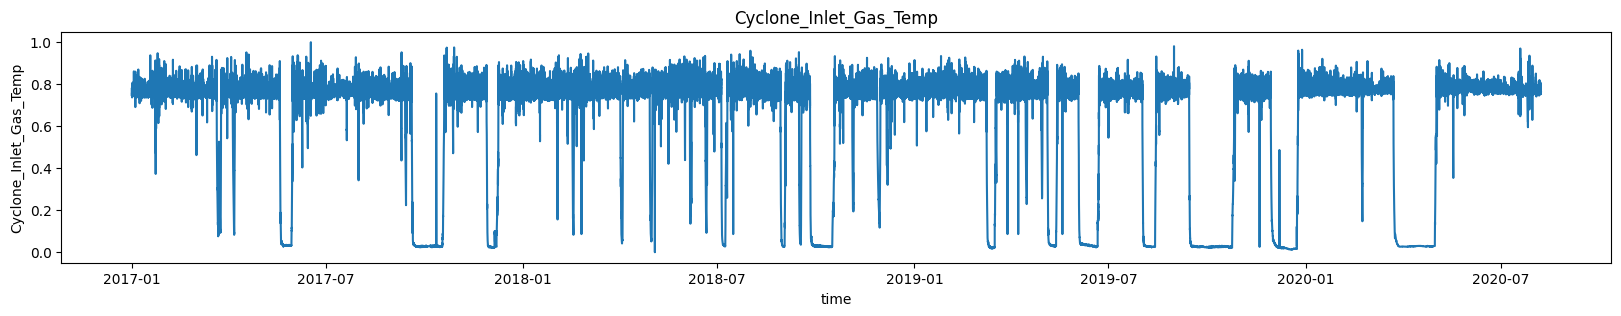

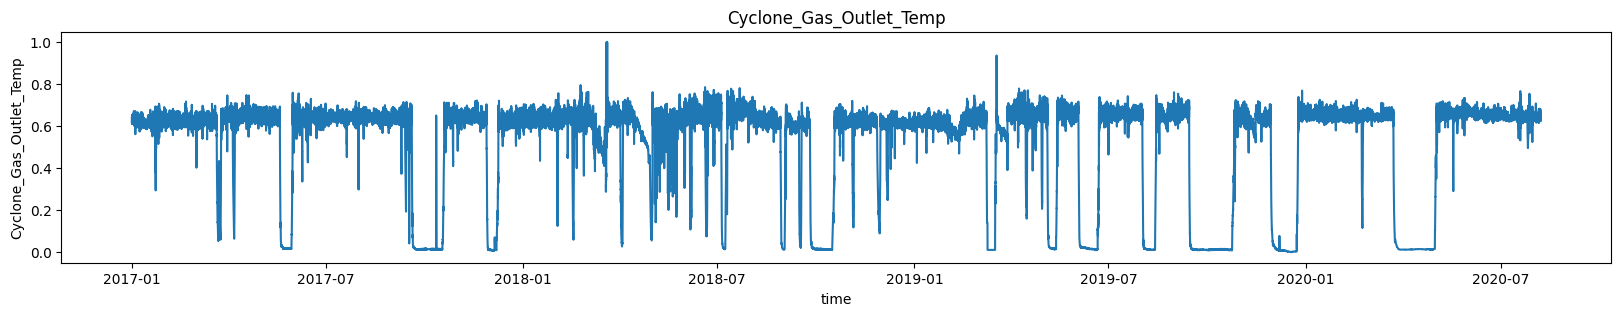

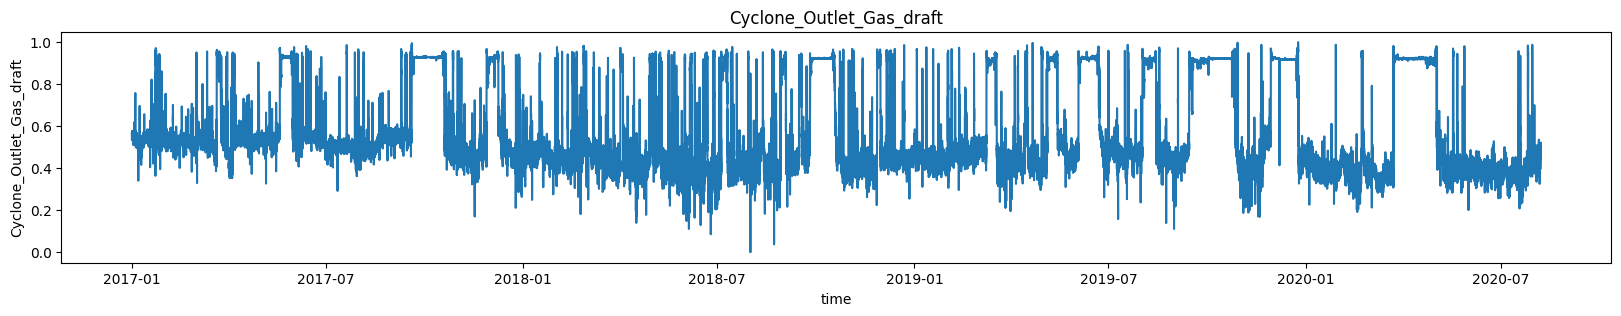

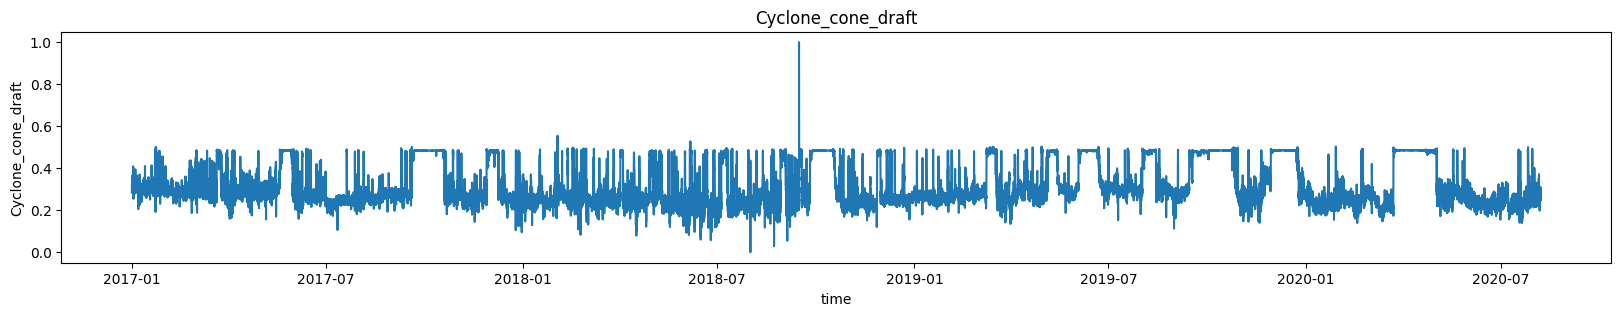

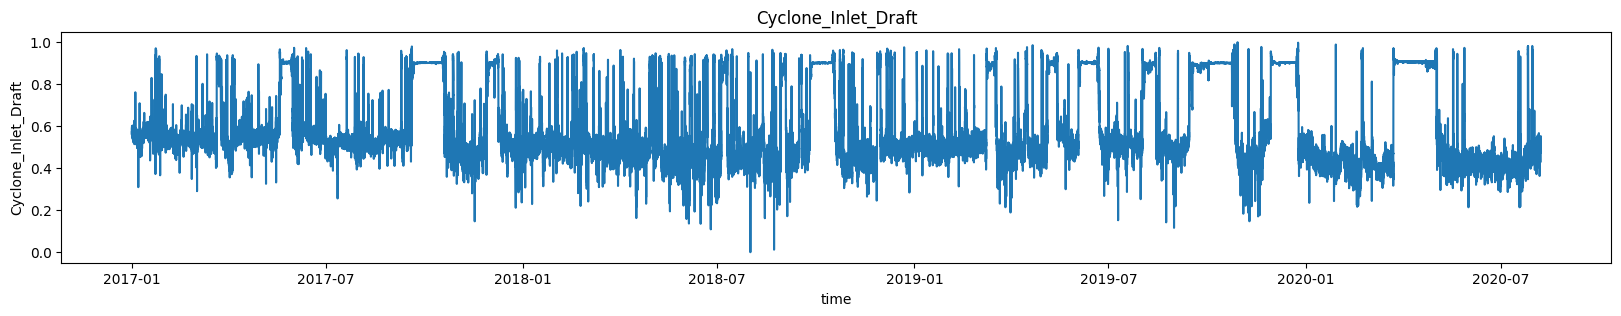

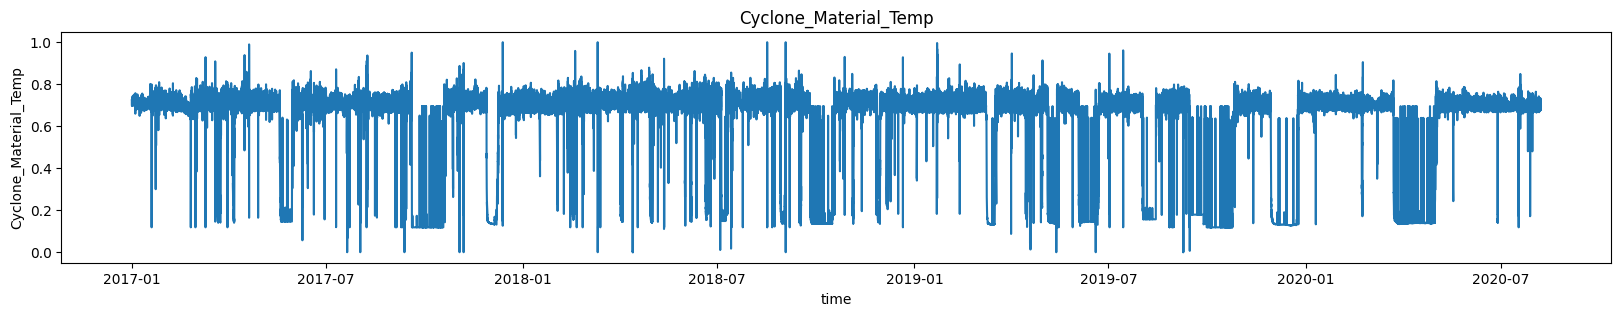

In [4]:
# features = [df.columns
# print(features)
features = ['Cyclone_Inlet_Gas_Temp', 'Cyclone_Gas_Outlet_Temp', 'Cyclone_Outlet_Gas_draft',
'Cyclone_cone_draft', 'Cyclone_Inlet_Draft', 'Cyclone_Material_Temp']
for i in range(len(features)):
    plt.figure(figsize=(20,3))
    plt.plot(df[features[i]])
    plt.title(features[i])
    plt.xlabel('time')
    plt.ylabel(features[i])

<Figure size 2000x1000 with 0 Axes>

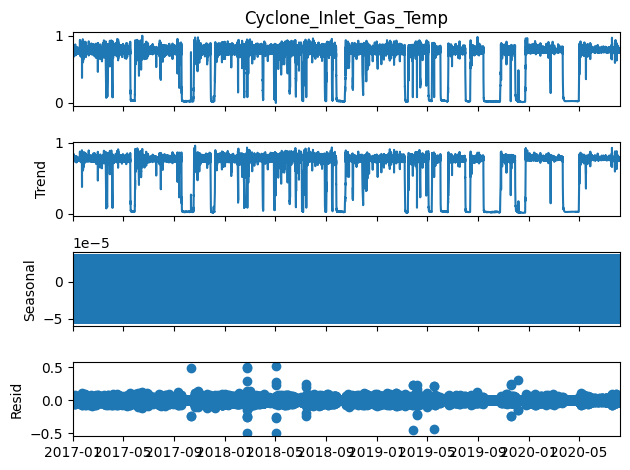

<Figure size 2000x1000 with 0 Axes>

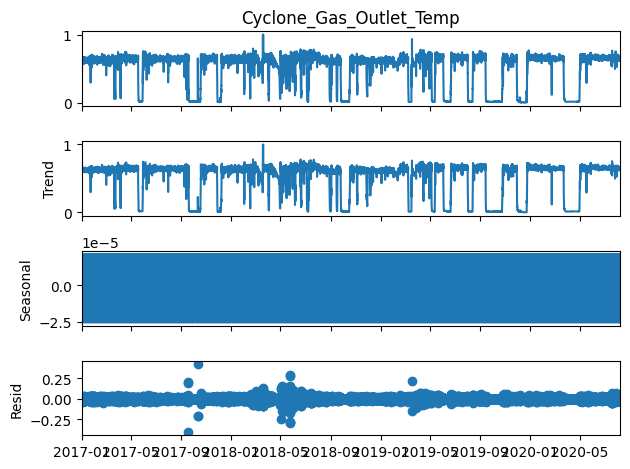

<Figure size 2000x1000 with 0 Axes>

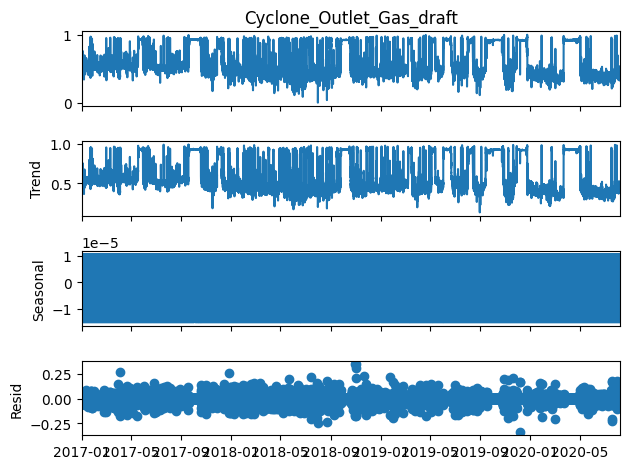

<Figure size 2000x1000 with 0 Axes>

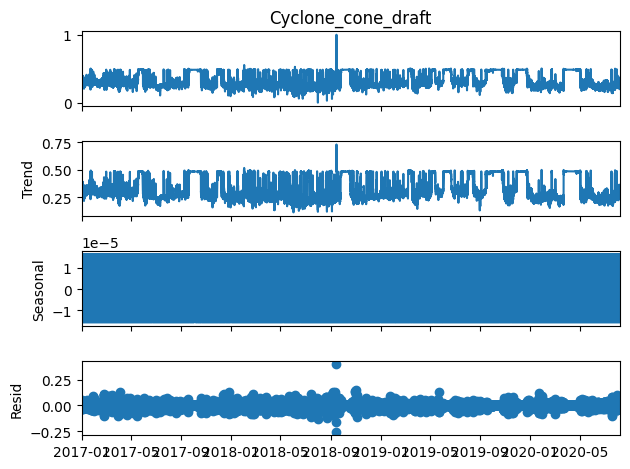

<Figure size 2000x1000 with 0 Axes>

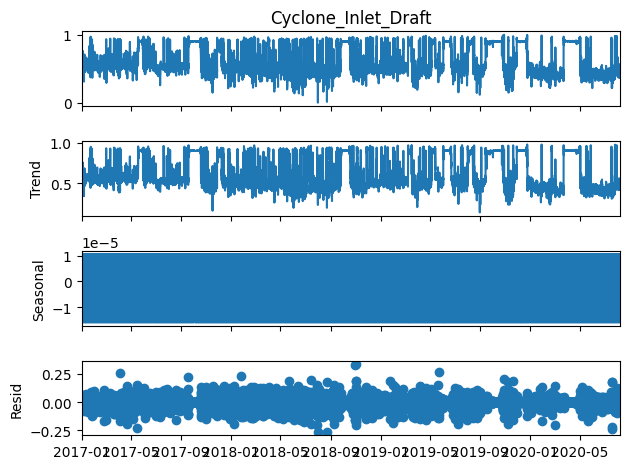

<Figure size 2000x1000 with 0 Axes>

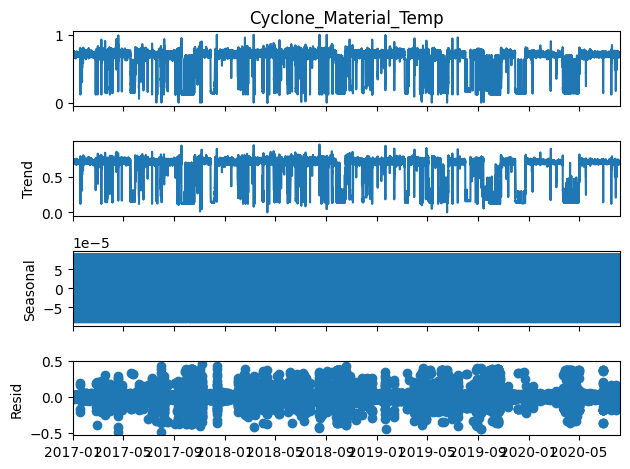

In [5]:
for i in features:
    decompose = seasonal_decompose(df[i], model = 'additive', period = 3)
    plt.figure(figsize=(20,10))
    decompose.plot()
    plt.show()

<Axes: >

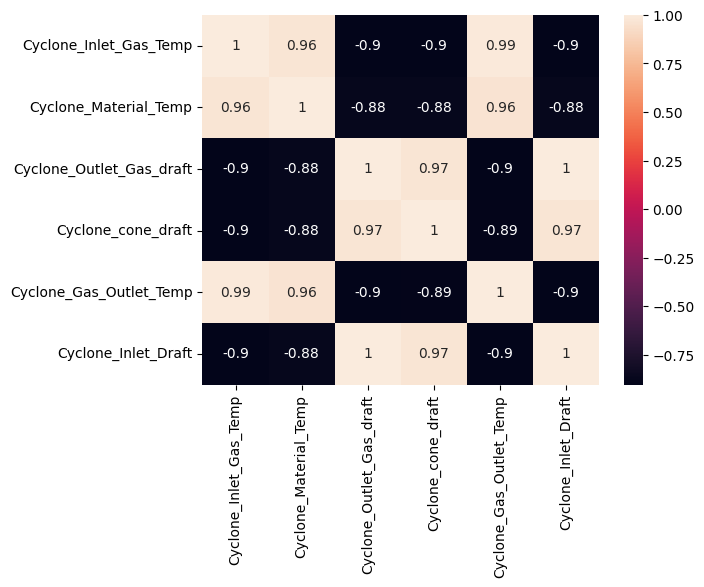

In [6]:
correlation = df.corr()
sns.heatmap(correlation, annot=True)

In [8]:
from statsmodels.tsa.stattools import adfuller 

dftest = adfuller(df['Cyclone_Material_Temp'])
print('adf result:', dftest[0])
print('p-value:', dftest[1])
print('critical values:' )
for keys, values in dftest[4].items():
    print(keys,':', values)

adf result: -10.45519983425672
p-value: 1.4045436070886791e-18
critical values:
1% : -3.4303674133166617
5% : -2.8615476964753803
10% : -2.5667740965536816


IT IS NOTICED THAT THE NULL HYPOTHESIS IS REJECTED AND HENCE THE DATA IS STATIONART 
AS P VALUES IS VERY CLOSE TO ZERO (<0.005)

In [ ]:
#CODE NOT EXECUTED DUE TO LONG RUNNING AND PROCESSING TIME

# for i in features:
#     print(f'ADF test for {i} feature')
#     dftest = adfuller(df[''])
#     print('adf result:', dftest[0])
#     print('p-value:', dftest[1])
#     print('critical values:' )
#     for keys, values in dftest[4].items():
#         print(keys,':', values)